# Load Library dan Dataset Mentah

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import time
from copy import deepcopy

df = pd.read_csv('Dataset_Sentimen_Emosi.csv')


# Pre-Processing Tahap 00
### Delete Label "Sentimen"

In [137]:
df = df.drop(['Sentimen'], axis=1)

df.head()
df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   904 non-null    object
 1   Emosi   904 non-null    int64 
 2   step01  904 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.3+ KB


,Tweet,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1,cegah mata rantai covid mari kita dirumah sa...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1,aku mohon yaallah semoga wabah covid menghil...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2,nyuruh orang pintar lu aja togog itu kerumunan...
...,...,...,...
899,Seluruh negara di dunia mengalami masa sulit k...,-2,seluruh negara di dunia mengalami masa sulit k...
900,"Setelah covid dan skripsi disaster selesai, ma...",2,setelah covid dan skripsi disaster selesai mau...
901,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...",1,malam ini projek benda boleh bincang malam d...
902,Pontang - panting di koyak covid 19,-2,pontang panting di koyak covid


# Pre-Processing Tahap 01
### Penataan Data

In [102]:
!pip install ekphrasis
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],

    annotate={"hashtag"},
    fix_html=True,
    
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


## Pembersihan Element

In [138]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def remove_rt(text):
    return text.replace('RT'," ")

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def lower(text):
    return text.lower()

def change_stripe(text):
    return text.replace('-'," ")

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_excessive_dot(text):
    return text.replace('..'," ")

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text) 

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

i = 0
final_string = []
s = ""
for text in df['Tweet'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc) 
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

df["step01"] = final_string
df.head(10)

,Tweet,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1,cegah mata rantai covid mari kita dirumah sa...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1,aku mohon yaallah semoga wabah covid menghil...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2,nyuruh orang pintar lu aja togog itu kerumunan...
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1,pikir balik byk mnde plk nk setelkn lepas covid
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1,selamat pagi hari jumat jumat keempat di kala ...
7,"Hikmah di balik musibah covid-19, smg para pej...",-2,hikmah di balik musibah covid smg para pejab...
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1,cegah covid beserta jajaran polsek kuranji m...
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1,ya allah kami memohon pada mu perkenankanlah d...


## Hapus Data Kosong

In [142]:
df_hapus = df[~df['step01'].str.contains(" ")]
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 78 to 78
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1 non-null      object
 1   Emosi   1 non-null      int64 
 2   step01  1 non-null      object
dtypes: int64(1), object(2)
memory usage: 32.0+ bytes


In [143]:
df_hapus.head(10)

,Tweet,Emosi,step01
78,covid,1,covid


In [144]:
df_new = df[~df.isin(df_hapus)].dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   903 non-null    object 
 1   Emosi   903 non-null    float64
 2   step01  903 non-null    object 
dtypes: float64(1), object(2)
memory usage: 28.2+ KB


In [145]:
df_new

,Tweet,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...
...,...,...,...
899,Seluruh negara di dunia mengalami masa sulit k...,-2.0,seluruh negara di dunia mengalami masa sulit k...
900,"Setelah covid dan skripsi disaster selesai, ma...",2.0,setelah covid dan skripsi disaster selesai mau...
901,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...",1.0,malam ini projek benda boleh bincang malam d...
902,Pontang - panting di koyak covid 19,-2.0,pontang panting di koyak covid


## Pembersihan data dengan konsep rubah kata **SLANG** menjadi kata **BAKU**

In [146]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
  return word_tokenize(text)

df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

df_new.head(10)

,Tweet,Emosi,step01,tokens
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me..."
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga..."
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]"
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k..."
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir balik byk mnde plk nk setelkn lepas covid,"[pikir, balik, byk, mnde, plk, nk, setelkn, le..."
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jumat jumat keempat di kala ...,"[selamat, pagi, hari, jumat, jumat, keempat, d..."
7,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid smg para pejab...,"[hikmah, di, balik, musibah, covid, smg, para,..."
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid beserta jajaran polsek kuranji m...,"[cegah, covid, beserta, jajaran, polsek, kuran..."
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank..."


In [148]:
normalized_word = pd.read_csv('kamus_clean.csv', sep=",")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

df_new["step02"] = final_string_tokens

df_new.head(10)

,Tweet,Emosi,step01,tokens,final_tokens,step02
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me...","[aku, mohon, yaallah, semoga, wabah, covid, me...",aku mohon yaallah semoga wabah covid menghilan...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, hmm, hoax]",covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, lu, aja, togog, itu, k...",nyuruh orang pintar lu aja togog itu kerumunan...
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir balik byk mnde plk nk setelkn lepas covid,"[pikir, balik, byk, mnde, plk, nk, setelkn, le...","[pikir, balik, byk, mnde, plk, nk, setelkn, le...",pikir balik byk mnde plk nk setelkn lepas covid
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,selamat pagi hari jumat jumat keempat di kala ...,"[selamat, pagi, hari, jumat, jumat, keempat, d...","[selamat, pagi, hari, jumat, jumat, keempat, d...",selamat pagi hari jumat jumat keempat di kala ...
7,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,hikmah di balik musibah covid smg para pejab...,"[hikmah, di, balik, musibah, covid, smg, para,...","[hikmah, di, balik, musibah, covid, smg, para,...",hikmah di balik musibah covid smg para pejabat...
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid beserta jajaran polsek kuranji m...,"[cegah, covid, beserta, jajaran, polsek, kuran...","[cegah, covid, beserta, jajaran, polsek, kuran...",cegah covid beserta jajaran polsek kuranji mel...
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank...","[ya, allah, kami, memohon, pada, mu, perkenank...",ya allah kami memohon pada mu perkenankanlah d...


In [149]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

## Stemming menggunakan Sastawi

In [150]:
dataset = pd.read_csv('clean_dataset_uts_part01.csv', sep=';')
dataset.head()

,Unnamed: 0,Tweet,Emosi,step01,tokens,final_tokens,step02
0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...
1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...
2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...
3,3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"['covid', 'belum', 'nyampe', 'prigen', 'mbak',...","['covid', 'belum', 'nyampe', 'prigen', 'mbak',...",covid belum nyampe prigen mbak hmm hoax
4,4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...","['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...",nyuruh orang pintar lu aja togog itu kerumunan...


## Load Sastrawi

In [151]:
!pip install PySastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang','yg']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

dictionary = ArrayDictionary(data)
str_stopwords = StopWordRemover(dictionary)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
df_new['step02'] = df_new['step02'].apply(str)

In [154]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

df_new.loc[:, ('ProcessedText')] = final_string
df_new.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...,cegah rantai covid mari rumah minggu
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"[aku, mohon, yaallah, semoga, wabah, covid, me...","[aku, mohon, yaallah, semoga, wabah, covid, me...",aku mohon yaallah semoga wabah covid menghilan...,yaallah moga wabah covid hilang ramadhan
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status tanggap darurat covi...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, hmm, hoax]",covid belum nyampe prigen mbak hmm hoax,covid nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,nyuruh orang pintar lu aja togog itu kerumunan...,"[nyuruh, orang, pintar, lu, aja, togog, itu, k...","[nyuruh, orang, pintar, lu, aja, togog, itu, k...",nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh pintar lu aja togog kerumun nularin cov...


### Save File untuk Jaga Jaga

In [155]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

# Modeling
## bagi menjadi feature dan label

In [156]:
dataset = pd.read_csv('clean_dataset_uts_part02.csv',sep=';')
dataset.shape

(903, 8)

In [157]:
dataset.head(3)

,Unnamed: 0,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah rantai covid mari rumah minggu
1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,yaallah moga wabah covid hilang ramadhan
2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status tanggap darurat covi...


In [158]:
dataset_feature = df_new['ProcessedText']
dataset_feature

0                   cegah rantai covid mari rumah minggu
1               yaallah moga wabah covid hilang ramadhan
2      pemprov papua naik status tanggap darurat covi...
3                      covid nyampe prigen mbak hmm hoax
4      nyuruh pintar lu aja togog kerumun nularin cov...
                             ...                        
899    negara dunia alami sulit covid rakyat indonesi...
900    covid skripsi disaster selesai bgt bljr masak ...
901    malam projek benda bincang malam fb satu belia...
902                          pontang panting koyak covid
903    isu jangkit covid alaaaa bosan laaa laaa barbe...
Name: ProcessedText, Length: 903, dtype: object

In [159]:
dataset_label = df_new['Emosi']
dataset_label

0      1.0
1     -1.0
2      1.0
3     -2.0
4     -2.0
      ... 
899   -2.0
900    2.0
901    1.0
902   -2.0
903   -2.0
Name: Emosi, Length: 903, dtype: float64

## Cek Distribusi Data

In [160]:
dataset_label.value_counts()

 1.0    300
-1.0    245
-2.0    201
 2.0    157
Name: Emosi, dtype: int64

In [161]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

 1.0    33.2%
-1.0    27.1%
-2.0    22.3%
 2.0    17.4%
Name: Emosi, dtype: object

<Figure size 864x576 with 0 Axes>

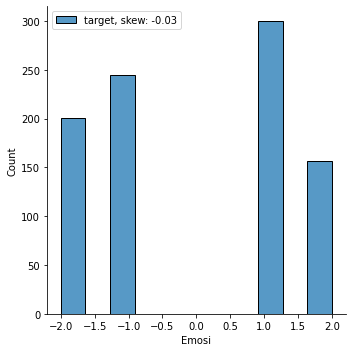

In [162]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

Kesimpulan Dataset : 

# Fitur Ekstraksi Menggunakan TF-IDF
## Cek Emosi

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

positive_low_reviews = df_new[(df_new["Emosi"] == 1)]
negative_low_reviews = df_new[(df_new["Emosi"] == -1)]
positive_high_reviews = df_new[(df_new["Emosi"] == 2)]
negative_high_reviews = df_new[(df_new["Emosi"] == -2)]

## Cek emosi positive low

In [164]:
positive_low_reviews.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"[cegah, mata, rantai, covid, mari, kita, dirum...","[cegah, mata, rantai, covid, mari, kita, dirum...",cegah mata rantai covid mari kita dirumah saja...,cegah rantai covid mari rumah minggu
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status tanggap darurat covi...
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir balik byk mnde plk nk setelkn lepas covid,"[pikir, balik, byk, mnde, plk, nk, setelkn, le...","[pikir, balik, byk, mnde, plk, nk, setelkn, le...",pikir balik byk mnde plk nk setelkn lepas covid,pikir byk mnde plk nk setelkn lepas covid
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid beserta jajaran polsek kuranji m...,"[cegah, covid, beserta, jajaran, polsek, kuran...","[cegah, covid, beserta, jajaran, polsek, kuran...",cegah covid beserta jajaran polsek kuranji mel...,cegah covid serta jajar polsek ranji aksi pedu...
15,"Ada 15 cara menyuruh Covid-19 segera pergi, Ja...",1.0,ada cara menyuruh covid segera pergi jaga ...,"[ada, cara, menyuruh, covid, segera, pergi, ja...","[ada, cara, menyuruh, covid, segera, pergi, ja...",ada cara menyuruh covid segera pergi jaga kebe...,suruh covid pergi jaga bersih tertib covid did...


In [165]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_low_reviews["ProcessedText"].values)

In [166]:
Positive_1_tf_idf.shape

(300, 4527)

In [167]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('covid', 7.976469502589806)
('sebar', 6.184710033361751)
('cegah', 6.164090746159015)
('virus', 6.099552225021444)
('rumah', 5.69408711691328)
('corona', 5.511765560119326)
('yg', 5.511765560119326)
('sebar covid', 5.47094356559907)
('jaga', 5.383932188609441)
('perintah', 5.337412172974547)
('virus covid', 5.288622008805115)
('masyarakat', 5.237328714417565)
('sebar virus', 5.237328714417565)
('sehat', 5.237328714417565)
('virus corona', 5.237328714417565)
('tangan', 5.183261493147289)
('cegah covid', 5.12610307930734)
('cegah sebar', 5.12610307930734)
('corona covid', 5.12610307930734)
('date', 5.12610307930734)
('warga', 5.12610307930734)
('indonesia', 5.065478457490905)
('pasien', 5.065478457490905)
('dampak', 4.9319470648663835)
('kabupaten', 4.9319470648663835)
('kait', 4.9319470648663835)
('masker', 4.9319470648663835)
('pandemi', 4.9319470648663835)
('polsek', 4.9319470648663835)
('tugas', 4.9319470648663835)
('wabah', 4.9319470648663835)
('sakit', 4.857839092712661)
('giat', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [168]:
!pip3 install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


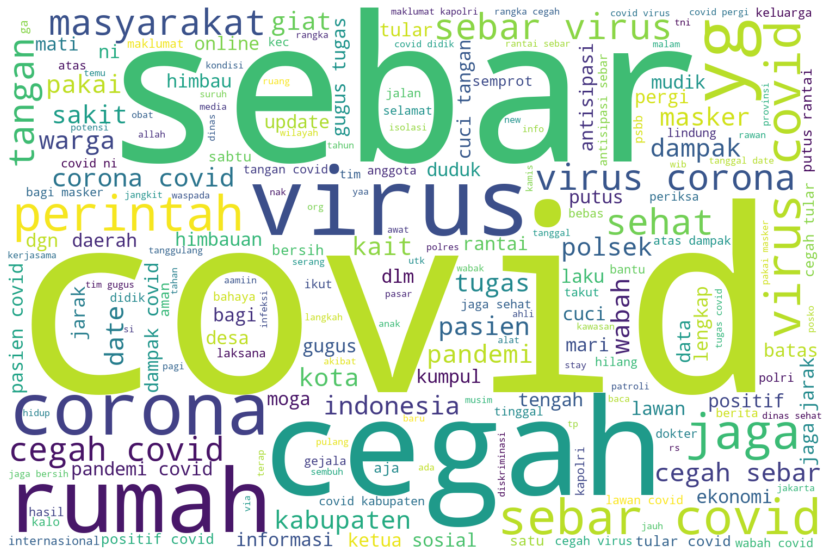

In [170]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

PlotWordCloud(d)

## Cek Emosi Positive High

In [174]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_high_reviews["ProcessedText"].values)
Positive_1_tf_idf.shape

(157, 2448)

In [175]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('covid', 7.96128548781931)
('bantu', 6.156280791841234)
('sebar', 5.881843946139474)
('corona', 5.827776724869198)
('lawan', 5.827776724869198)
('pandemi', 5.827776724869198)
('pandemi covid', 5.770618311029249)
('virus', 5.770618311029249)
('masyarakat', 5.576462296588292)
('tangan', 5.576462296588292)
('lawan covid', 5.50235432443457)
('rumah', 5.50235432443457)
('cegah', 5.422311616761034)
('indonesia', 5.422311616761034)
('corona covid', 5.335300239771404)
('perintah', 5.335300239771404)
('tengah', 5.335300239771404)
('yg', 5.335300239771404)
('mari', 5.239990059967079)
('medis', 5.239990059967079)
('sebar covid', 5.239990059967079)
('sehat', 5.239990059967079)
('virus corona', 5.239990059967079)
('wabah', 5.239990059967079)
('dampak', 5.134629544309252)
('alhamdulillah', 5.016846508652869)
('apd', 5.016846508652869)
('lengkap', 5.016846508652869)
('putus', 5.016846508652869)
('rawan', 5.016846508652869)
('sebar virus', 5.016846508652869)
('virus covid', 5.016846508652869)
('wabah

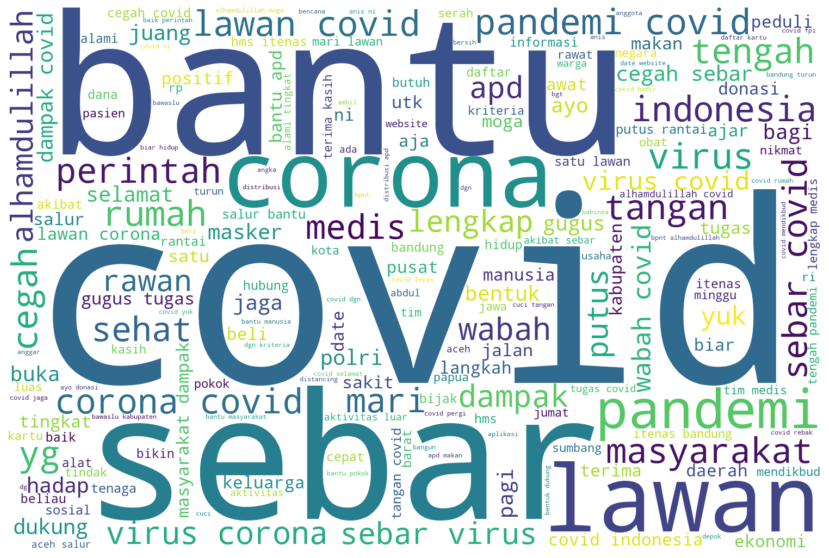

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

PlotWordCloud(d)

## Cek emosi negative low

In [177]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(negative_low_reviews["ProcessedText"].values)
Positive_1_tf_idf.shape

(245, 4000)

In [178]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('covid', 7.945706917633338)
('moga', 6.2323380823510055)
('yg', 6.0781874025237475)
('allah', 5.630162679996786)
('wabah', 5.630162679996786)
('corona', 5.490400737621628)
('positif', 5.490400737621628)
('wabah covid', 5.490400737621628)
('virus', 5.439107443234078)
('dunia', 5.385040221963802)
('indonesia', 5.385040221963802)
('tinggal', 5.385040221963802)
('cepat', 5.327881808123854)
('doa', 5.327881808123854)
('pandemi', 5.267257186307418)
('pasien', 5.267257186307418)
('rumah', 5.267257186307418)
('ga', 5.059617821529174)
('positif covid', 5.059617821529174)
('sehat', 5.059617821529174)
('selamat', 5.059617821529174)
('akibat', 4.9795751138556374)
('dr', 4.9795751138556374)
('kalo', 4.9795751138556374)
('tambah', 4.9795751138556374)
('warga', 4.9795751138556374)
('manusia', 4.892563736866007)
('mati', 4.892563736866007)
('pergi', 4.892563736866007)
('sembuh', 4.892563736866007)
('tangan', 4.892563736866007)
('udah', 4.892563736866007)
('akibat covid', 4.797253557061683)
('kota', 4

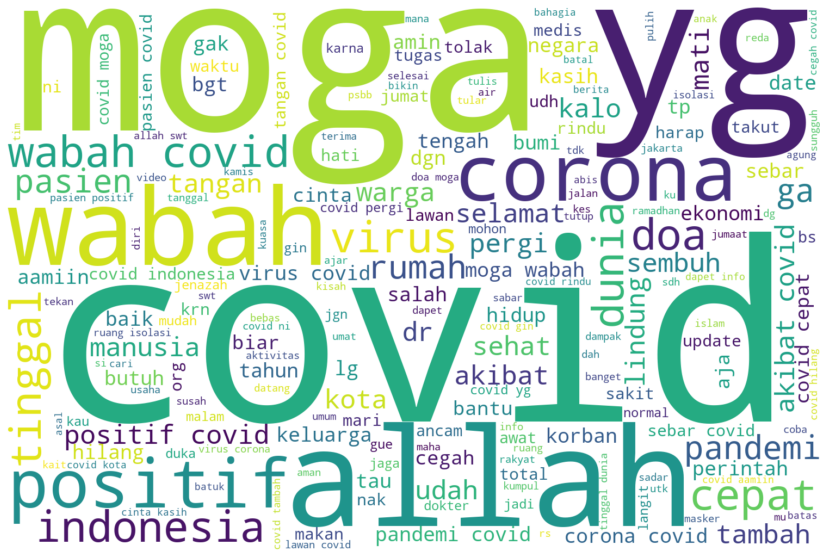

In [180]:
PlotWordCloud(d)

## Cek emosi negative high

In [181]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(negative_high_reviews["ProcessedText"].values)
Positive_1_tf_idf.shape

(201, 4013)

In [182]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('covid', 7.985037127323288)
('yg', 6.8348670289903275)
('jenazah', 5.636171281765236)
('tolak', 5.636171281765236)
('virus', 5.582104060494959)
('wabah', 5.582104060494959)
('aja', 5.4643210248385765)
('negara', 5.4643210248385765)
('perintah', 5.399782503701005)
('rumah', 5.399782503701005)
('warga', 5.399782503701005)
('corona', 5.330789632214054)
('tinggal', 5.330789632214054)
('wabah covid', 5.330789632214054)
('ga', 5.256681660060332)
('gak', 5.256681660060332)
('ni', 5.256681660060332)
('berita', 5.176638952386796)
('indonesia', 5.176638952386796)
('biar', 5.089627575397166)
('kalo', 5.089627575397166)
('lu', 5.089627575397166)
('org', 5.089627575397166)
('pasien', 5.089627575397166)
('rakyat', 5.089627575397166)
('sih', 5.089627575397166)
('tangan', 5.089627575397166)
('dgn', 4.994317395592841)
('makam', 4.994317395592841)
('mati', 4.994317395592841)
('nolak', 4.994317395592841)
('positif', 4.994317395592841)
('tp', 4.994317395592841)
('udah', 4.994317395592841)
('bebas', 4.888

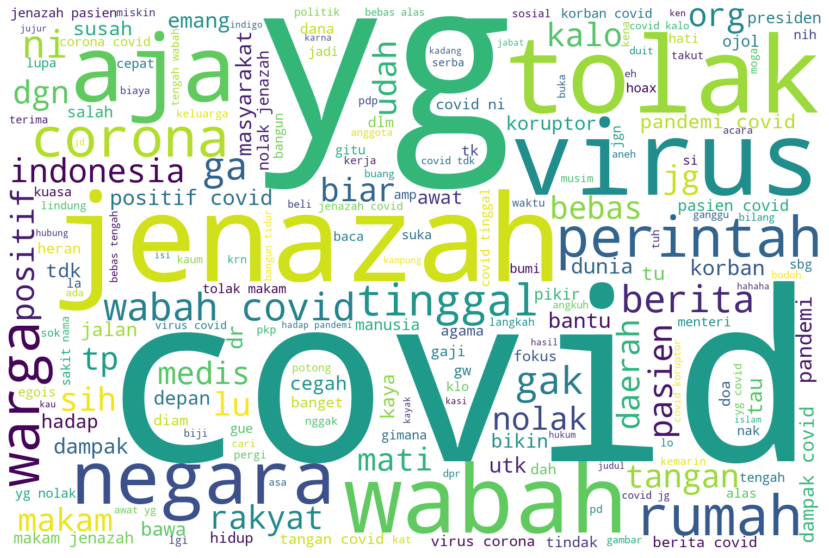

In [183]:
PlotWordCloud(d)

# CEK EMOSI SEMUA LABEL

In [184]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [188]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [189]:
Data_TFIDF.shape

(903, 12340)

# Training dibagi 70 - 30

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [193]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [194]:
test_x

70     selamat ingat jumat agung selamat makna korban...
458    cegah covid serta jajar polsek ranji aksi pedu...
219    warga kabupaten lampung utara nyata positif pa...
251    mimpi malam psbb tahan batal covid data tambah...
39          sinergitas tni polri cegah sebar virus covid
                             ...                        
865                    yg bahaya covid lurus belok pergi
639    gerak lawan covid ayo juang informasi indonesi...
353    personil polsek karanglewas laksana patroli ma...
466    amal langkah langkah cegah tular covid amal hi...
641        wakakakkaka puter cahaya tolong time covid ni
Name: ProcessedText, Length: 271, dtype: object

# Model - Naive Bayes

In [199]:
from sklearn.naive_bayes import MultinomialNB
# classifier_nb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

In [200]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [201]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [202]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [203]:
classifier_nb.fit(train_x, train_label.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

## Accuracy Training dan Test Set

In [204]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.9778481012658228
Accuracy Test set:  0.4612546125461255


## Recall Training dan Test Set

In [205]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.9778481012658228
Recall Test set:  0.4612546125461255


## Precision Training dan Test Set

In [206]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.9778954257296489
Precision Test set:  0.4668508162168365


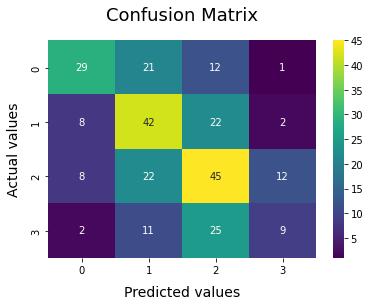

In [207]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# VISUALISASI

In [208]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [209]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.977848,0.461255


In [210]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [211]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.461255,0.461255,0.466851


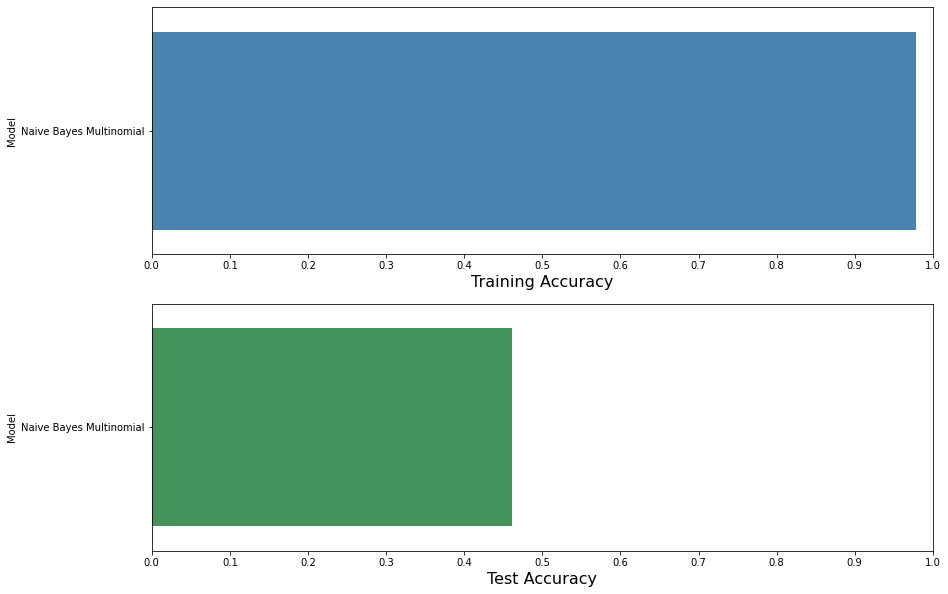

In [212]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# **KESIMPULAN**

Dari eksperimen yang dilakukan DENGAN SKEMA MENGGUNAKAN TARGET EMOSI mulai dari tahap pre-processing hingga visualisasi didapat analisis dan PERFORMA bahwa model naive bayes menghasilkan hasil uji sebagai berikut :   

*Accuracy Training set:*  0.9778481012658228
<br>
*Accuracy Test set:*  0.4612546125461255


*Recall Training set:*  0.9778481012658228
<br>
*Recall Test set:*  0.4612546125461255


*Precision Training set:*  0.9778954257296489
<br>
*Precision Test set:*  0.4668508162168365